# ASSIGNMENT - 2

### Problem Statement
Convolutional neural network (CNN) (Any One from the following)
- Use any dataset of plant disease and design a plant disease detection system using CNN.
- Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

In [4]:
trainX

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

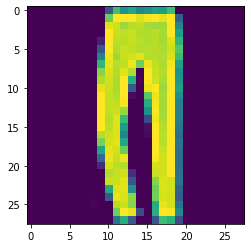

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[2])

In [6]:
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [7]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [8]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
history = classifier.fit(trainX, trainY,
 batch_size=128, epochs=20,verbose=2,
 validation_data=(testX, testY))

Epoch 1/20
469/469 - 26s - loss: 0.5624 - accuracy: 0.7949 - val_loss: 0.3831 - val_accuracy: 0.8614 - 26s/epoch - 55ms/step
Epoch 2/20
469/469 - 25s - loss: 0.3550 - accuracy: 0.8706 - val_loss: 0.3421 - val_accuracy: 0.8760 - 25s/epoch - 53ms/step
Epoch 3/20
469/469 - 25s - loss: 0.3096 - accuracy: 0.8864 - val_loss: 0.3014 - val_accuracy: 0.8885 - 25s/epoch - 53ms/step
Epoch 4/20
469/469 - 25s - loss: 0.2825 - accuracy: 0.8963 - val_loss: 0.2913 - val_accuracy: 0.8925 - 25s/epoch - 54ms/step
Epoch 5/20
469/469 - 25s - loss: 0.2595 - accuracy: 0.9051 - val_loss: 0.2667 - val_accuracy: 0.9037 - 25s/epoch - 54ms/step
Epoch 6/20
469/469 - 25s - loss: 0.2406 - accuracy: 0.9113 - val_loss: 0.2632 - val_accuracy: 0.9072 - 25s/epoch - 54ms/step
Epoch 7/20
469/469 - 25s - loss: 0.2242 - accuracy: 0.9169 - val_loss: 0.2636 - val_accuracy: 0.9029 - 25s/epoch - 54ms/step
Epoch 8/20
469/469 - 26s - loss: 0.2128 - accuracy: 0.9207 - val_loss: 0.2493 - val_accuracy: 0.9087 - 26s/epoch - 55ms/step


0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

NameError: name 'image' is not defined

In [21]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

test_img = Image.open('bag.jpg').convert('L')
test_img = test_img.resize((28, 28))
test_img = image.img_to_array(test_img)
test_img = test_img.reshape(1, 28, 28, 1)
test_img = test_img / 255.0



In [22]:
np.argmax(classifier.predict(test_img), axis=-1)

1/1 [==============================] - 0s 37ms/step


array([2], dtype=int64)